In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [30]:
random_state = 42

In [13]:
# Загрузка данных
path = "./data/Mall_Customers.csv"
data = pd.read_csv(path)

In [18]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [17]:
data.Genre = data.Genre.map({'Male': 1, 'Female': 0})

In [25]:
# Выбор признаков
features = data.drop('CustomerID', axis=1).columns.to_list()
X = data[features]

In [27]:
# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[:5]

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992]])

In [29]:
# Применение PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Первые 5 строк данных после PCA:")
print(X_pca[:5])
print("Доля объясненной дисперсии:", pca.explained_variance_ratio_)

Первые 5 строк данных после PCA:
[[-0.40638272 -0.52071363]
 [-1.42767287 -0.3673102 ]
 [ 0.05076057 -1.89406774]
 [-1.6945131  -1.63190805]
 [-0.31310838 -1.81048272]]
Доля объясненной дисперсии: [0.33690046 0.26230645]


In [32]:
# Опередляем количество кластеров, используя метод локтя
inetias = []
silhouettes = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=random_state)
    kmeans.fit(X_pca) # Кластеризация на данных после PCA
    inetias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_pca, kmeans.labels_))

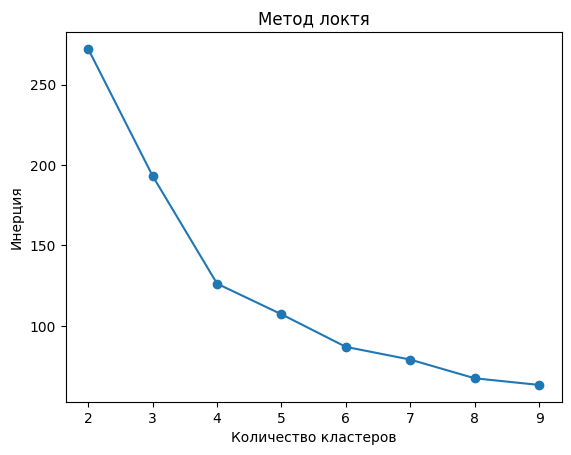

In [34]:
# график метода локтя
plt.plot(k_range, inetias, marker='o')
plt.title("Метод локтя")
plt.xlabel("Количество кластеров")
plt.ylabel("Инерция")
plt.show()

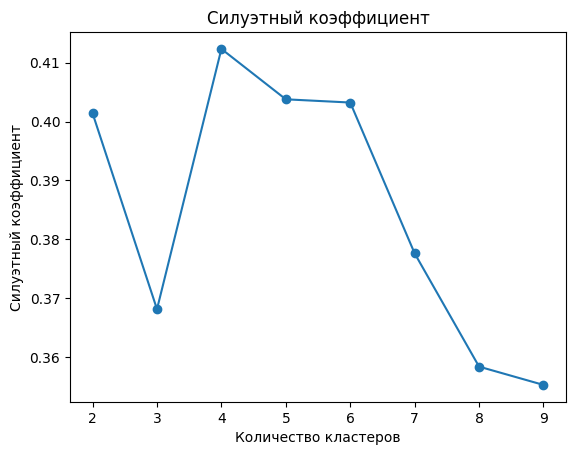

In [35]:
# График силуэтного коэффициента
plt.plot(k_range, silhouettes, marker='o')
plt.title("Силуэтный коэффициент")
plt.xlabel("Количество кластеров")
plt.ylabel("Силуэтный коэффициент")
plt.show()

In [36]:
n_clusters = 4

In [37]:
# Кластеризация
kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=random_state)
data['Cluster'] = kmeans.fit_predict(X_pca)

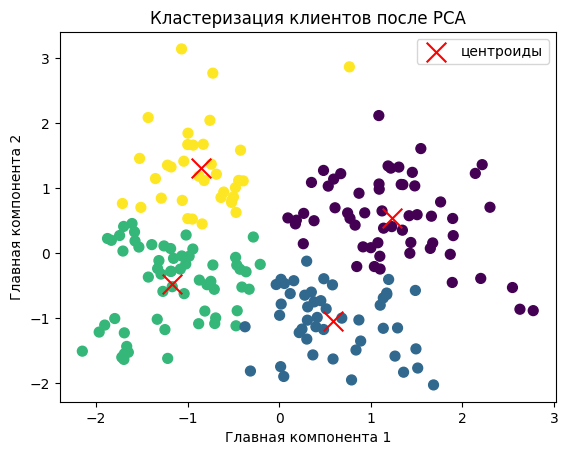

In [38]:
# Визуализация
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', s=200, marker='x', label='центроиды')
plt.title("Кластеризация клиентов после PCA")
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.legend()
plt.show()

In [40]:
# Добавляем метки кластеров к исходным данным
data['Cluster'] = kmeans.labels_

# Средние занчения признаков по кластерам
print("Средние значения признаков по кластерам:")
print(data.groupby("Cluster")[features].mean())

Средние значения признаков по кластерам:
            Genre        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.775862  49.068966           70.344828               28.568966
1        0.063830  47.680851           45.212766               37.808511
2        0.183333  27.233333           49.983333               67.933333
3        0.828571  29.971429           83.085714               72.285714
